In [2]:
#OS used for upload ceate modify file in specific locaton on windows
import os
#pandas used for extract data transform and load
import pandas as pd
#numpy used calculate mathematics equation
import numpy as np
#seaborn and matplot used for visualize data 
import seaborn as sns
import matplotlib.pyplot as  plt

In [8]:
os.listdir(r"D:\Data Analyst\project of uber\uber\Datasets")

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [10]:
#read file csv show data 
uber_15 = pd.read_csv("D:/Data Analyst/project of uber/uber/Datasets/uber-raw-data-janjune-15_sample.csv")


In [12]:
#show how many rows and column include in data
uber_15.shape


(100000, 4)

In [13]:
#type of data identify
type(uber_15)

pandas.core.frame.DataFrame

In [14]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140


In [15]:
#find duplicate value
uber_15.duplicated().sum()

54

In [16]:
#update dataframe remove duplicate value
uber_15.drop_duplicates(inplace = True)


In [17]:
#chek again dupicate value
uber_15.duplicated().sum()

0

In [18]:
uber_15.shape

(99946, 4)

In [19]:
#check datatype
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [20]:
#check missing value
uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [21]:
uber_15['Pickup_date'][0]

'2015-05-02 21:43:00'

In [22]:
type(uber_15['Pickup_date'][0])

str

In [23]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'])
uber_15['Pickup_date']

0       2015-05-02 21:43:00
1       2015-01-20 19:52:59
2       2015-03-19 20:26:00
3       2015-04-10 17:38:00
4       2015-03-23 07:03:00
                ...        
99995   2015-04-13 16:12:00
99996   2015-03-06 21:32:00
99997   2015-03-19 19:56:00
99998   2015-05-02 16:02:00
99999   2015-06-24 16:04:00
Name: Pickup_date, Length: 99946, dtype: datetime64[ns]

In [24]:
uber_15['Pickup_date'].dtype

dtype('<M8[ns]')

In [25]:
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


In [26]:
#Problem statement
#which month have max.Uber pickeups in new york city?
uber_15['month'] = uber_15['Pickup_date'].dt.month_name()
uber_15['month'] 

0            May
1        January
2          March
3          April
4          March
          ...   
99995      April
99996      March
99997      March
99998        May
99999       June
Name: month, Length: 99946, dtype: object

<Axes: xlabel='month'>

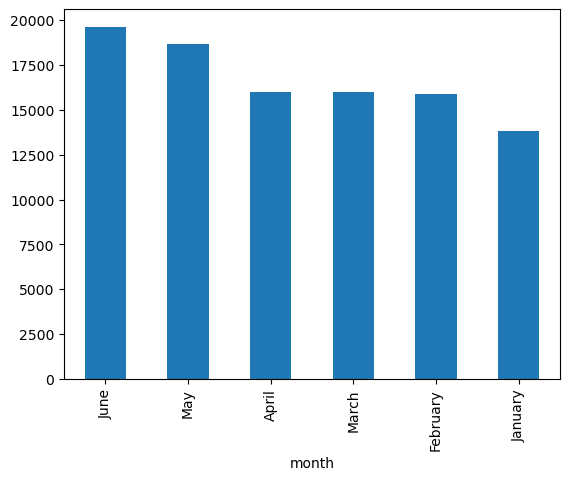

In [27]:
#count vaue of month
uber_15['month'].value_counts().plot(kind = 'bar')

In [28]:
#show day wise
uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.month
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minute'] = uber_15['Pickup_date'].dt.minute

In [29]:
uber_15.head(4)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,5,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,1,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,3,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,4,17,38


In [30]:
#get data in (ndex = month, column = weekday) format
pivot = pd.crosstab(index = uber_15['month'], columns = uber_15['weekday'])
pivot

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


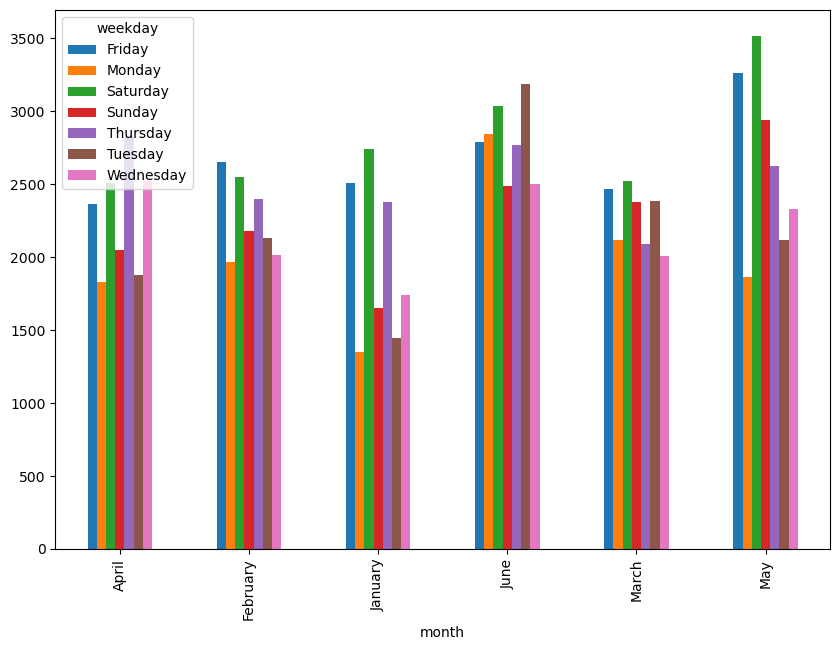

In [31]:
pivot.plot(kind = 'bar',figsize=(10,7))
pivot

In [32]:
#Find hourly roush in new york city
summary = uber_15.groupby(['weekday','hour'], as_index = False).size()

<Axes: xlabel='hour', ylabel='size'>

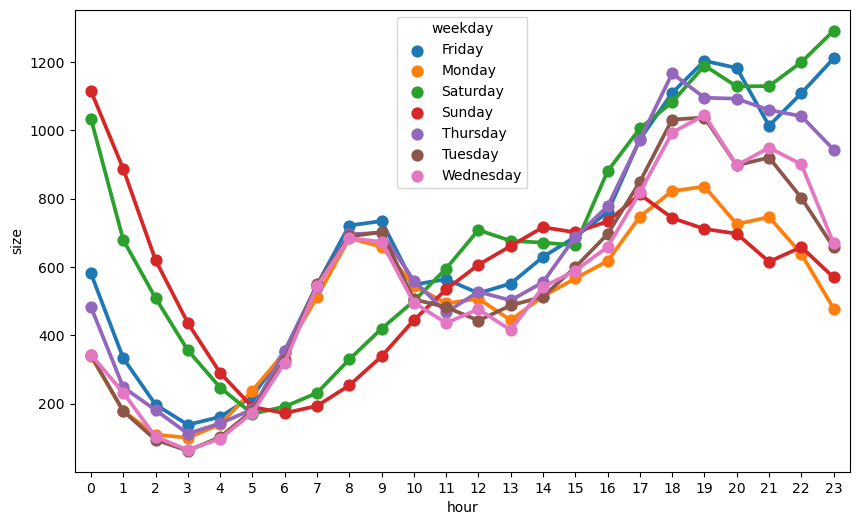

In [33]:
plt.figure(figsize =(10, 6))
sns.pointplot(x="hour", y="size", hue="weekday", data=summary)

In [34]:
#which base_number has most number of active_vehicles?
os.listdir(r"D:\Data Analyst\project of uber\Datasets")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\Data Analyst\\project of uber\\Datasets'

In [ ]:
uber_foil = pd.read_csv("D:/Data Analyst\project of uber/Datasets/Uber-Jan-Feb-FOIL.csv")
uber_foil

In [ ]:
uber_foil.shape

In [ ]:
uber_foil.head()

In [ ]:
uber_foil.columns


In [ ]:
!pip install chart_studio
!pip install plotly

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot , iplot

In [ ]:
init_notebook_mode(connected = True)

In [34]:
uber_foil.columns


Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [35]:

px.box(x = 'dispatching_base_number', y ='active_vehicles',data_frame = uber_foil)

# Collect entire data

In [36]:
files = os.listdir("D:\Data Analyst\project of uber\Datasets")[-8:]
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [37]:
files.remove('uber-raw-data-janjune-15_sample.csv')

In [38]:
files.remove('uber-raw-data-janjune-15.csv')

In [39]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [40]:
final = pd.DataFrame()
path = "D:\Data Analyst\project of uber\Datasets"
for file in files:
    currect_df = pd.read_csv(path+'/'+file)
    final = pd.concat([currect_df,final])

In [41]:
final.shape

(4534327, 4)

In [42]:
final.duplicated().sum()

82581

In [43]:
final.drop_duplicates(inplace = True)

In [44]:
final.shape

(4451746, 4)

In [45]:
final.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [46]:
rush_uber = final.groupby(['Lat' , 'Lon'] , as_index=False).size()

In [47]:
rush_uber.head(6)

,Lat,Lon,size
0,39.6569,-74.2258,1
1,39.6686,-74.1607,1
2,39.7214,-74.2446,1
3,39.8416,-74.1512,1
4,39.9055,-74.0791,1
5,39.9196,-74.1112,1


In [66]:
final.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'day', 'hour'], dtype='object')

In [48]:
import folium

In [49]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [50]:
basemap = folium.Map()

In [51]:
basemap

In [52]:
from folium.plugins import HeatMap
HeatMap(rush_uber).add_to(basemap)

In [53]:
#Examine rush on Hour and weekday(perform pair wise analysis)
final.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [54]:
final.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [55]:
final.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [56]:
final['Date/Time'][0]

0    9/1/2014 0:01:00
0    5/1/2014 0:02:00
0    6/1/2014 0:00:00
0    7/1/2014 0:03:00
0    8/1/2014 0:03:00
0    4/1/2014 0:11:00
Name: Date/Time, dtype: object

In [57]:
final['Date/Time'] = pd.to_datetime(final['Date/Time'],format='%m/%d/%Y %H:%M:%S')
final['Date/Time']

0        2014-09-01 00:01:00
1        2014-09-01 00:01:00
2        2014-09-01 00:03:00
3        2014-09-01 00:06:00
4        2014-09-01 00:11:00
                 ...        
564511   2014-04-30 23:22:00
564512   2014-04-30 23:26:00
564513   2014-04-30 23:31:00
564514   2014-04-30 23:32:00
564515   2014-04-30 23:48:00
Name: Date/Time, Length: 4451746, dtype: datetime64[ns]

In [58]:
final['Date/Time'].dtype

dtype('<M8[ns]')

In [59]:
final['day'] = final['Date/Time'].dt.day
final['hour'] = final['Date/Time'].dt.hour
final.head(4)

,Date/Time,Lat,Lon,Base,day,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0


In [60]:
pivot = final.groupby(['day' , 'hour']).size().unstack()
pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,...,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,...,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,...,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,...,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,...,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,...,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,...,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,...,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,...,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


In [61]:
pivot.style.background_gradient()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


In [ ]:
#how too automate our analysis
#to automate process create funtin and pass arrgument it work dynamically
#generate pivot table
def gen_pivot_table(df, col1, col2,col3):
    pivot = final.groupby([col1 , col2]).size().unstack()
    return pivot.style.background_gradient()

In [71]:
final.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'day', 'hour'], dtype='object')

In [ ]:
#pass diff argumment in above fun and generate pivot table for diff pairs
gen_pivot_table(final,'day','Base')

In [ ]:
gen_pivot_table(final,'day','Date/Time')